I am using this Jupyter Notebook to do a sanity check of the EEG data of our first LOC pilot.
Date: 04.12.2025

We import some libraries that we will use

In [41]:
import mne
import matplotlib.pyplot as plt
import numpy as np

sub_number = 's01'

In [ ]:
# 1. Define the relative path from the working directory 
# First, the working directory should be set to the location of the jupyter notebook: project/scrips/eeg/
data_path_relative = '../../data/raw/pilot_01/eeg_data/loc_s01.vhdr'

# 2. Load the BrainVision (.vhdr) file
try:
    # mne.io.read_raw_brainvision automatically reads the associated
    # .vmrk and .eeg files based on the .vhdr path.
    raw = mne.io.read_raw_brainvision(data_path_relative, preload=True)
    
    # 3. Success message
    print("\nData loaded successfully!")
    print(raw)
    
except FileNotFoundError:
    print(f"\nERROR: File not found at the path: {full_path}")
    print("Please double-check the relative path from your current directory.")
except Exception as e:
    print(f"\nAn error occurred during MNE loading: {e}")

# The 'raw' object now contains the EEG data, ready for sanity checks & visual inspection.

Loading data from: c:\Users\noahm\projects\loc_analysis\data\raw\pilot_01\eeg_data\loc_s01.vhdr

Extracting parameters from ../../data/raw/pilot_01/eeg_data/loc_s01.vhdr...
Setting channel info structure...
Reading 0 ... 3109759  =      0.000 ...  3109.759 secs...

Data loaded successfully!
<RawBrainVision | loc_s01.eeg, 65 x 3109760 (3109.8 s), ~1.51 GiB, data loaded>


Now, let's check the metadata of our file. 
We should see 63 EEG channels + 2 EOG channels.
We can also check the measurement time, the sampling frequency, and the channel names.
No channels should be marked as bad at this point.

In [ ]:
# Print basic info
print(raw.info)

# Get indices of all channels
print("All channel names:")
print(raw.ch_names)

# Were EOG channels also recorded?
print("\nLast 5 channels:")
print(raw.ch_names[-5:])

# Juan suggested that we should do downsampling to 500 Hz as one of the first steps

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 63 EEG, 2 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 280.0 Hz
 meas_date: 2025-12-02 11:40:38 UTC
 nchan: 65
 projs: []
 sfreq: 1000.0 Hz
>
All channel names:
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'AF8', 'AF4', 'F2', 'HEOG', 'VEOG']
65

Last 5 channels:
['AF8', 'AF4', 'F2', 'HEOG', 'VEOG']


If the metadata looks good, we can have a first look at the recorded EEG data. We start by plotting the 'events' in our dataset, which correspond to the triggers that were sent during the recording.

Used Annotations descriptions: [np.str_('Stimulus/S  1'), np.str_('Stimulus/S  2'), np.str_('Stimulus/S  3'), np.str_('Stimulus/S 43'), np.str_('Stimulus/S 50'), np.str_('Stimulus/S 51'), np.str_('Stimulus/S100'), np.str_('Stimulus/S101'), np.str_('Stimulus/S102'), np.str_('Stimulus/S103'), np.str_('Stimulus/S104'), np.str_('Stimulus/S105'), np.str_('Stimulus/S106'), np.str_('Stimulus/S107'), np.str_('Stimulus/S108'), np.str_('Stimulus/S199'), np.str_('Stimulus/S200'), np.str_('Stimulus/S201'), np.str_('Stimulus/S202'), np.str_('Stimulus/S203'), np.str_('Stimulus/S204'), np.str_('Stimulus/S205'), np.str_('Stimulus/S206'), np.str_('Stimulus/S207')]
Trigger codes found: {np.str_('Stimulus/S  1'): 1, np.str_('Stimulus/S  2'): 2, np.str_('Stimulus/S  3'): 3, np.str_('Stimulus/S 43'): 43, np.str_('Stimulus/S 50'): 50, np.str_('Stimulus/S 51'): 51, np.str_('Stimulus/S100'): 100, np.str_('Stimulus/S101'): 101, np.str_('Stimulus/S102'): 102, np.str_('Stimulus/S103'): 103, np.str_('Stimulus/S10

C:\Users\noahm\AppData\Local\Temp\ipykernel_29236\823507764.py:10: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'])


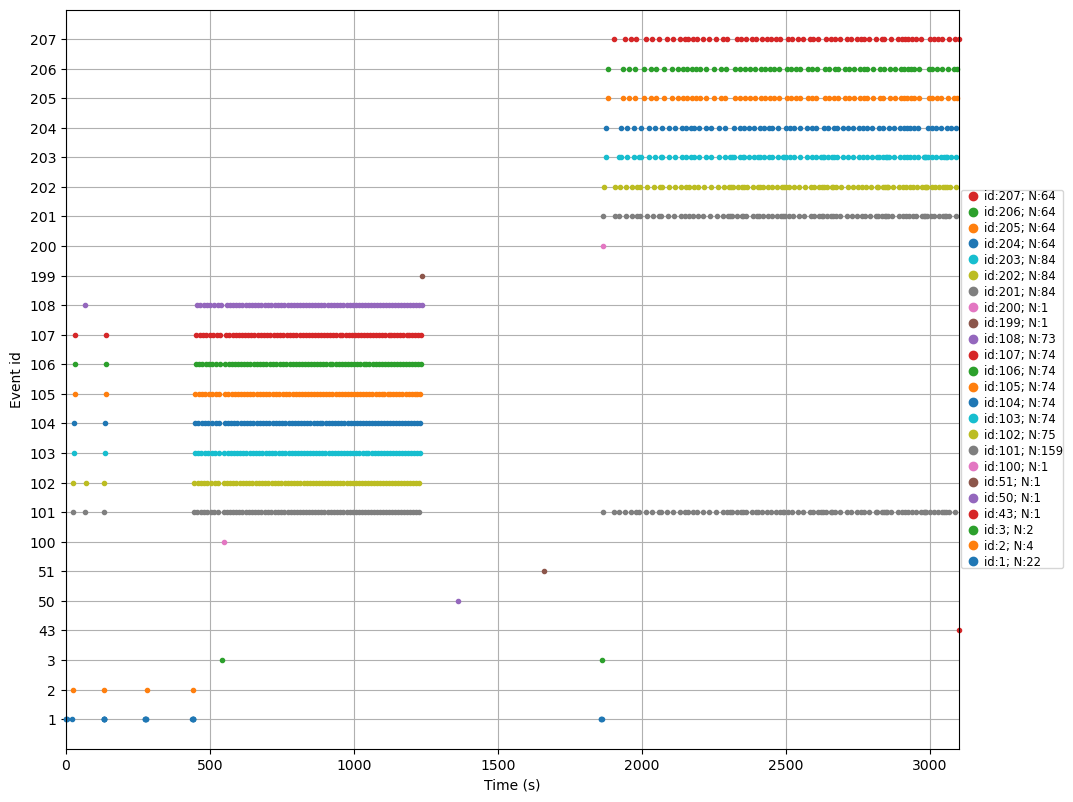

In [30]:
# Extract events (triggers) from the data
events, event_id = mne.events_from_annotations(raw)

# 1. Print the 'Dictionary' of triggers
# This tells you which numbers were found. 
# e.g., {'Stimulus/S 1': 1, 'Stimulus/S 10': 2}
print("Trigger codes found:", event_id)

# 2. Plot the timeline of triggers
fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'])

Some notes on the triggers for pilot_01:
- All the trigger codes that we defined, were sent through BUT 299 for ret_end (> 255) --> it was recoded to 43 = 299-256
- Clear demarcations of encoding (100-199), distractor (50-51), and retrieval phase (200-255)
- Trigger 1: Why are there so many? It should only encode "enc_instr_starts" and "ret_instr_starts"
- What's up with practice? Prac_start = 2, prac_end = 3. There should only be one for both of those.
- What is going on with the 100s BEFORE encoding starts at 100? 
- 101 seems to encode all fixation crosses. Maybe we should distinguish between encoding and retrieval.
- Trigger codes 102 to 108 should all have exactly the same N (cue, act1, act2,.., resp). Do we have 10 practice trials? Then, it should be N=74. Deviations at 102 = enc_cue, and 108 = enc_resp.
- Retrieval phase looks good.. I assume cue(201), seen before (202,203) appear 84 times because 20 new lures are included?
- Ivan suggests that trigger codes should reflect different encoding conditions... he was not sure how we could recode this later.

- For more systematic checking, I could implement a function that compares the length of a specific trigger to the corresponding column of the dataframe.

Setting 984057 of 3109760 (31.64%) samples to NaN, retaining 2125703 (68.36%) samples.
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


c:\Users\noahm\mne-python\1.11.0_0\Lib\site-packages\mne\viz\utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


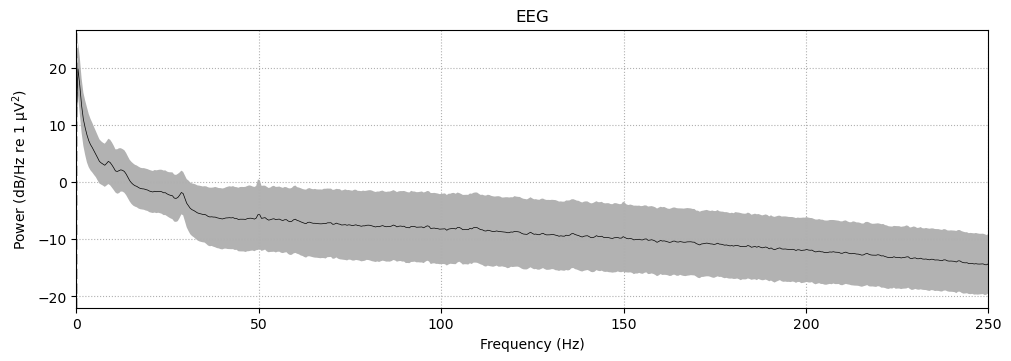

In [38]:
# Look at power line noise
# It should show up as a peak at 50 Hz
fig = raw.compute_psd(tmax=np.inf, fmax=250).plot(
    average=True, picks="data", exclude="bads"
)

Now, let's start with the visual inspection & annotation of the EEG data.
We annotate breaks (using code), and muscular artificats (manually) so they are discarded from future analyses. We will mark bad channels in a later step.

In [32]:
# Break annotation 
break_annots = mne.preprocessing.annotate_break(
    raw=raw,
    min_break_duration=30, 
    t_start_after_previous=2,
    t_stop_before_next=2
)
raw.set_annotations(raw.annotations + break_annots)

Ignoring annotations with descriptions starting with: bad, edge

Detected 7 break periods of >= 30 s duration:
    35.3 – 64.1 s [28.8 s]
    70.1 – 129.0 s [58.9 s]
    142.6 – 273.4 s [130.8 s]
    282.7 – 437.4 s [154.7 s]
    1237.5 – 1359.7 s [122.2 s]
    1363.7 – 1659.7 s [296.0 s]
    1663.7 – 1856.3 s [192.6 s]
In total, 31.6% of the data (984.1 s) have been marked as a break.



<RawBrainVision | loc_s01.eeg, 65 x 3109760 (3109.8 s), ~1.51 GiB, data loaded>

Channels marked as bad:
none


In [ ]:
# Here, we open the raw file and manually annotate muscular artifacts
# Open the plot always with the same parameter, so its an objective comparison between participants
# Create a new description called 'BAD_Muscle' and drag-and-drop intervals with excessive muscle noise..
scaling_dict = dict(eeg=20e-6)
fig = raw.plot(duration=10, n_channels=32, scalings=scaling_dict);
fig.fake_keypress("a")

In [ ]:
# Store annotations in a new variable 
interactive_annot = raw.annotations
# Save the annotations to a file
raw.annotations.save(f"loc-{sub_number}_saved-annotations.csv", overwrite=True)
# Set new annot to a copy of the data
raw_annotated = raw.copy().set_annotations(interactive_annot)

Channels marked as bad:
none


If I am reloading previously annotated data, load the annotations here:


In [ ]:
annot_from_file = mne.read_annotations(f"/mnt/NeuroNas/ivan/InstrAct_EEG/data/derivatives/sub-{sub_number}/sub-{sub_number}_saved-annotations.csv")
raw_annotated = raw.copy().set_annotations(annot_from_file)